<a href="https://colab.research.google.com/github/asadyousuf-dare/Thesis-work/blob/main/ann_regressiondeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
% ls

drive/  sample_data/


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd



In [4]:
data = pd.read_excel('/content/drive/MyDrive/slab/ann_slab/train_data.xlsx')

In [5]:
test = pd.read_excel('/content/drive/MyDrive/slab/ann_slab/test_data.xlsx')

In [6]:
data_target = pd.read_excel("/content/drive/MyDrive/slab/ann_slab/train_target.xlsx")

In [7]:
test_target = pd.read_excel("/content/drive/MyDrive/slab/ann_slab/test_target.xlsx")

In [8]:
mean = data.mean(axis = 0)

In [11]:
data -= mean

In [12]:
std = data.std(axis = 0)

In [13]:
data /= std

In [14]:
test -= mean

In [15]:
test /= std

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
def build_model():
 model = keras.Sequential([ 
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(1)
 ])
 model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
 return model

In [26]:
model = build_model() 

In [17]:
x_val = data [:500]

In [18]:
partial_x_train = data[500:] 

In [19]:
y_val = data_target [:500]

In [20]:
partial_y_target = data_target[500:]

In [27]:
history = model.fit (partial_x_train,partial_y_target,epochs = 100,batch_size = 100,validation_data = (x_val,y_val))

Epoch 1/100
15/15 [==============================] - 1s 15ms/step - loss: 1350217728.0000 - mae: 29847.8125 - val_loss: 1543854080.0000 - val_mae: 32238.0918
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 1350094848.0000 - mae: 29845.8477 - val_loss: 1543698816.0000 - val_mae: 32235.8887
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 1349926528.0000 - mae: 29843.3555 - val_loss: 1543486080.0000 - val_mae: 32233.0156
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 1349704704.0000 - mae: 29840.1836 - val_loss: 1543210752.0000 - val_mae: 32229.4238
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 1349418368.0000 - mae: 29836.2383 - val_loss: 1542857600.0000 - val_mae: 32224.9434
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 1349063040.0000 - mae: 29831.4219 - val_loss: 1542427008.0000 - val_mae: 32219.6016
Epoch 7/100
15/15 [==============================] - 0s 4

In [28]:
history_dict = history.history

In [29]:
history_dict.keys ()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [30]:
import matplotlib.pyplot as plt


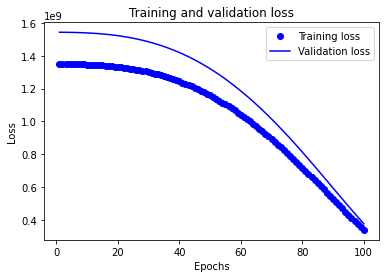

In [31]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


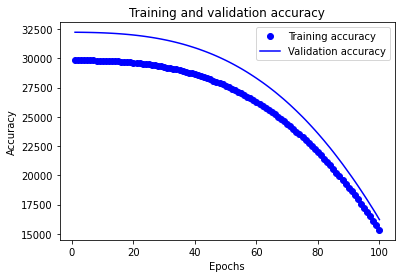

In [32]:
acc = history.history["mae"]
val_acc = history.history["val_mae"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()